# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia

#### Vish Panagari, vp5zg@virginia.edu


***
## 1. BIG PICTURE (5 pts)

The dataset I chose is a collection of attributes relevant to graduate admissions for students applying from the Indian subcontinent. As a person of Indian descent who has had the privilege of growing up in the United States, I have been given academic and career opportunities that people of similar stature in India are not. This dataset was originally creted to help Indian graduate students predict their chances of admission into universities. I would like to analyze this dataset for similar reasons to give me an understanding of the standard required for people of India to be given the same opportunities I have. The credit to creating this dataset goes to: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019.


 * How big is the dataset? (in terms of MB) -- 28.2 KB
 * How many entries does it have? -- 400 observations
 * How many features does it have? -- 9 basic features
 * What are some basic statistics you can learn right away about this dataset? 
     -- The mean, min, std, and max of the features
 

In [20]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/mohansacharya/graduate-admissions/version/2#_=_"; 
# required url to download for CSV file. The TA will need to download the file and run your program.

admission_df = pd.read_csv("Admission_Predict.csv") # read the csv into a dataframe
admission_df.head()
admission_df.columns = admission_df.columns.str.strip()


In [2]:
admission_df.count() # how many observations are in the dataframe
admission_df.info() # get some basic info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [3]:
admission_df.describe() # basic statistics about the dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discovery:** 


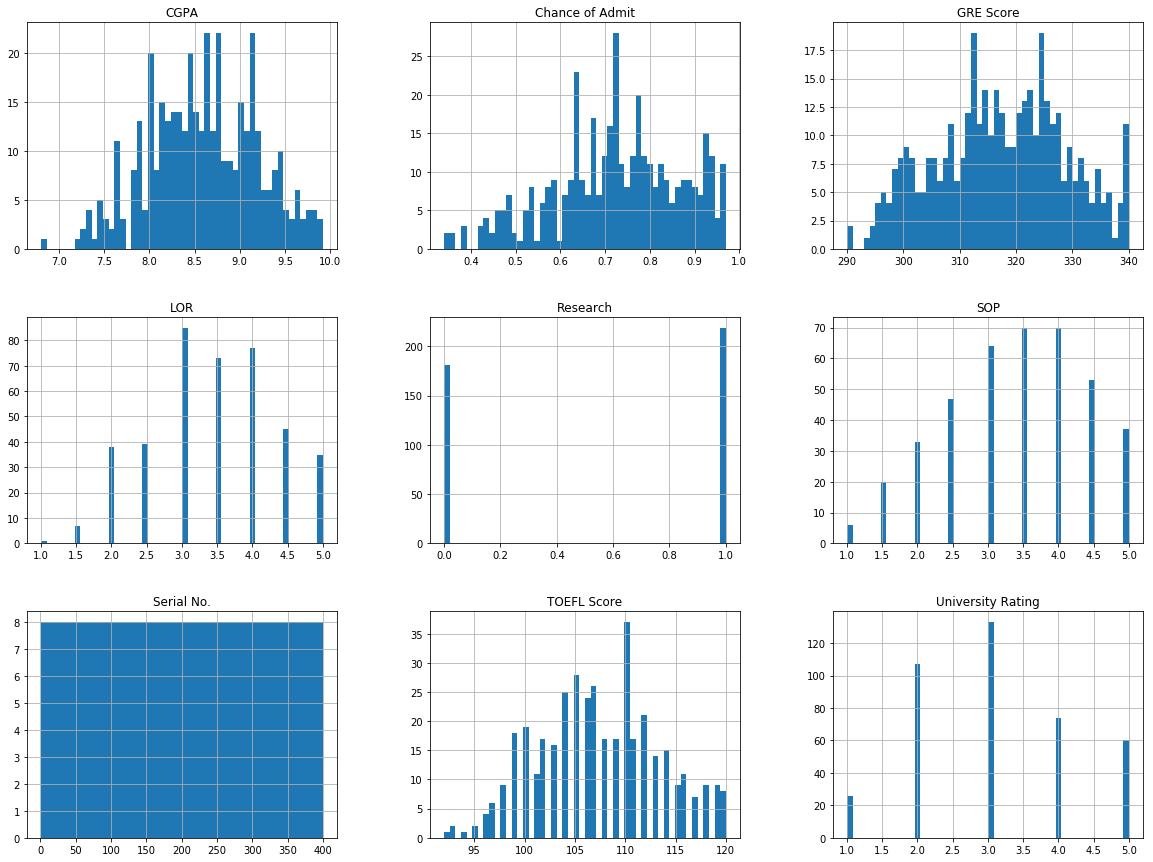

In [31]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# plot the features in a basic plot
%matplotlib inline
import matplotlib.pyplot as plt
admission_df.hist(bins=50, figsize=(20,15))
plt.show() 

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP       LOR      CGPA  Research  Chance of Admit  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138         0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391         0.802610  
TOEFL Sc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17341d68>,
      dtype=object)

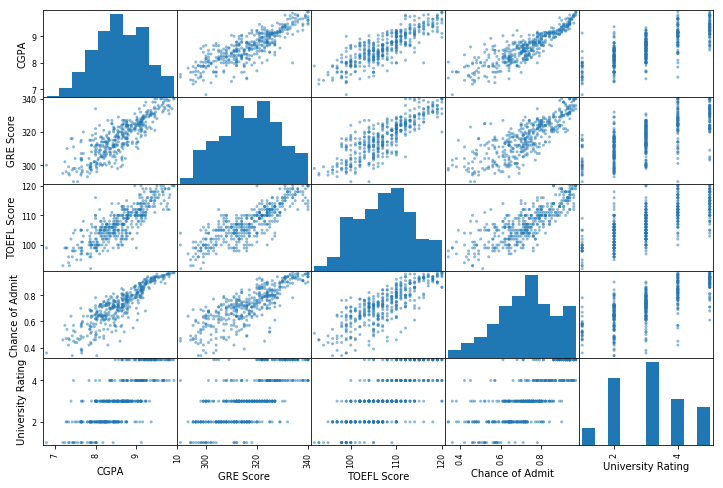

In [33]:
# checking the correlations of all the attributes
print(admission_df.corr())

# plotting a correlation matrix of some attributes
from pandas.plotting import scatter_matrix
attributes = ["CGPA","GRE Score", "TOEFL Score", 
              "Chance of Admit", "University Rating"]
scatter_matrix(admission_df[attributes], figsize=(12, 8))

**Feature Scaling** 

In [96]:

# Feature Scaling
train_set, test_set = train_test_split(admission_df, test_size = 0.2, random_state = 42)

X_train = train_set.drop("Chance of Admit", axis=1)
y_train = train_set["Chance of Admit"]

X_test = test_set.drop("Chance of Admit", axis=1)
y_test = test_set["Chance of Admit"]


scaler = StandardScaler().fit(X_train)                                     
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print( X_train.shape )
print( y_train.shape )

<class 'numpy.ndarray'>
(320, 8)
(320,)


/Users/Vish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Vish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/Vish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)


**Gradient Descent:** 

In [108]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
    def __int__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0; # learning rate
        self.cost  = 0; # cost function
        self.cost_list = [];
       
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        
        theta = np.random.randn(9,1)
        alpha = 0.1
        iters = 100
        cost, theta, cost_list = self.gradientDescent(X_train, y_train, theta, alpha, iters)
                
        self.theta = theta
        self.alpha = alpha
        self.cost = cost
        self.cost_list = cost_list
  
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here
        
        
        cost_list=[]
        m = X_train.shape[0]
        X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        
        for iteration in range(iters):
            loss = np.dot(X_train, theta) - y_train.values.reshape(-1,1)
            cost = np.sum(loss**2) / (m)
            cost_list.append(cost)
            gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train.values.reshape(-1,1))
            theta = theta - alpha * gradients
        return cost, theta, cost_list
        
    
    def predict(self, X_test):
        # implementation code here 
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        y_predict = X_test.dot(self.theta)
        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, y_train):
        # implementation code here for PART 4.
        X_a = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        theta_t = np.linalg.inv(X_a.T.dot(X_a)).dot(X_a.T).dot(y_train.values.reshape(-1,1))
        self.theta = theta_t;
        return self.theta
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)    

**Learning Rate:** 

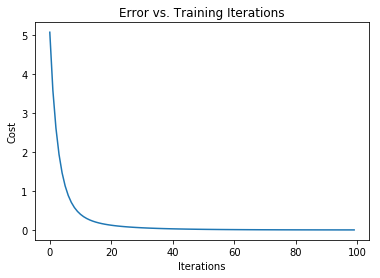

In [105]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
#

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')

plt.plot(myGradientDescentModel.cost_list)


- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In [106]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

array([[0.72528125],
       [0.02043738],
       [0.02207558],
       [0.02136452],
       [0.01239074],
       [0.00198186],
       [0.01485864],
       [0.05795908],
       [0.01081316]])

- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

In [107]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)


# myNormalEquationModel_rmse 

myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
y_predict = myNormalEquationModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
myNormalEquationModel_rmse = np.sqrt(mse)
print(myNormalEquationModel_rmse)


# myGradientDescentModel_rmse  

y_predict = myGradientDescentModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
myGradientDescentModel_rmse = np.sqrt(mse)
print(myGradientDescentModel_rmse)


0.07098256845382972
0.06794550952582497
0.07940065642106331


/Users/Vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

In the real world, my models can make a significant impact. Indian students applying to graduate schools across the world now have an acccurate model to predict their chances of entry into a school of their choice. I will pitch my solution to this project as an interactive predictor through some html so that I can offer a simple service while retaining accuraccy. I have learnt much from my analsysis, but most importantly I have reinforced my belief that it is harder for Indian people in India to get academic opportunities the way I, as an Indian American would. The exam scores and college GPA are important factors for prediction and are probably the best indicators of admission. Moving forward, I would like to expore a much larger dataset that allows me to make a more substantial model. 